<a href="https://colab.research.google.com/github/chrissaji/literate-giggle/blob/main/FireDetectionYolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.6/486.6 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 9.8 MB/s eta 0:00:00


In [1]:
!nvidia-smi

Fri Mar 24 07:19:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 21.5M/21.5M [00:00<00:00, 315MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
100% 104k/104k [00:00<00:00, 28.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 22.2ms
Speed: 0.6ms pre-process, 22.2ms inference, 48.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


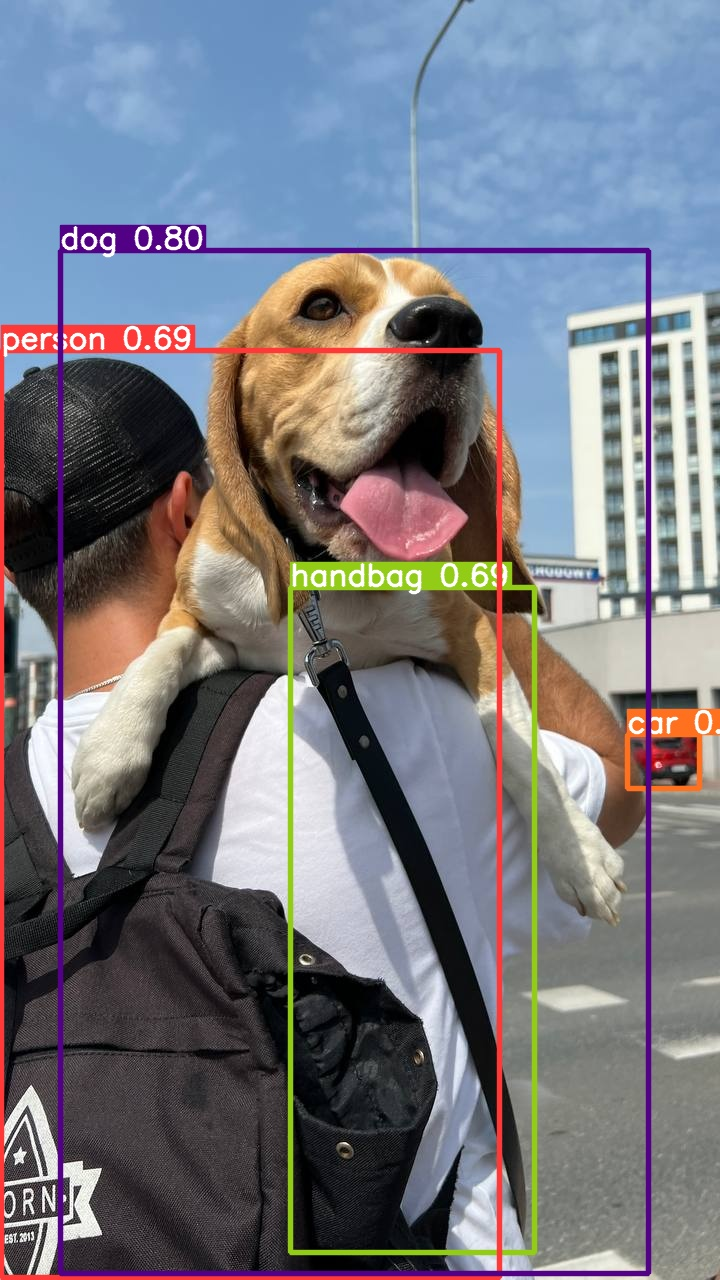

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="MUCid8JBQxb9C1H2OS5F")
project = rf.workspace("school-eu1it").project("fire-and-smoke-detection-xy1gf")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to fire-and-smoke-detection-1 in yolov8:: 100%|██████████| 412/412 [00:00<00:00, 1336.14it/s]


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=200 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/fire-and-smoke-detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=200, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fal

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1679643509.ff5036308385.5213.0  train_batch360.jpg
F1_curve.png					    train_batch361.jpg
P_curve.png					    train_batch362.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


/content


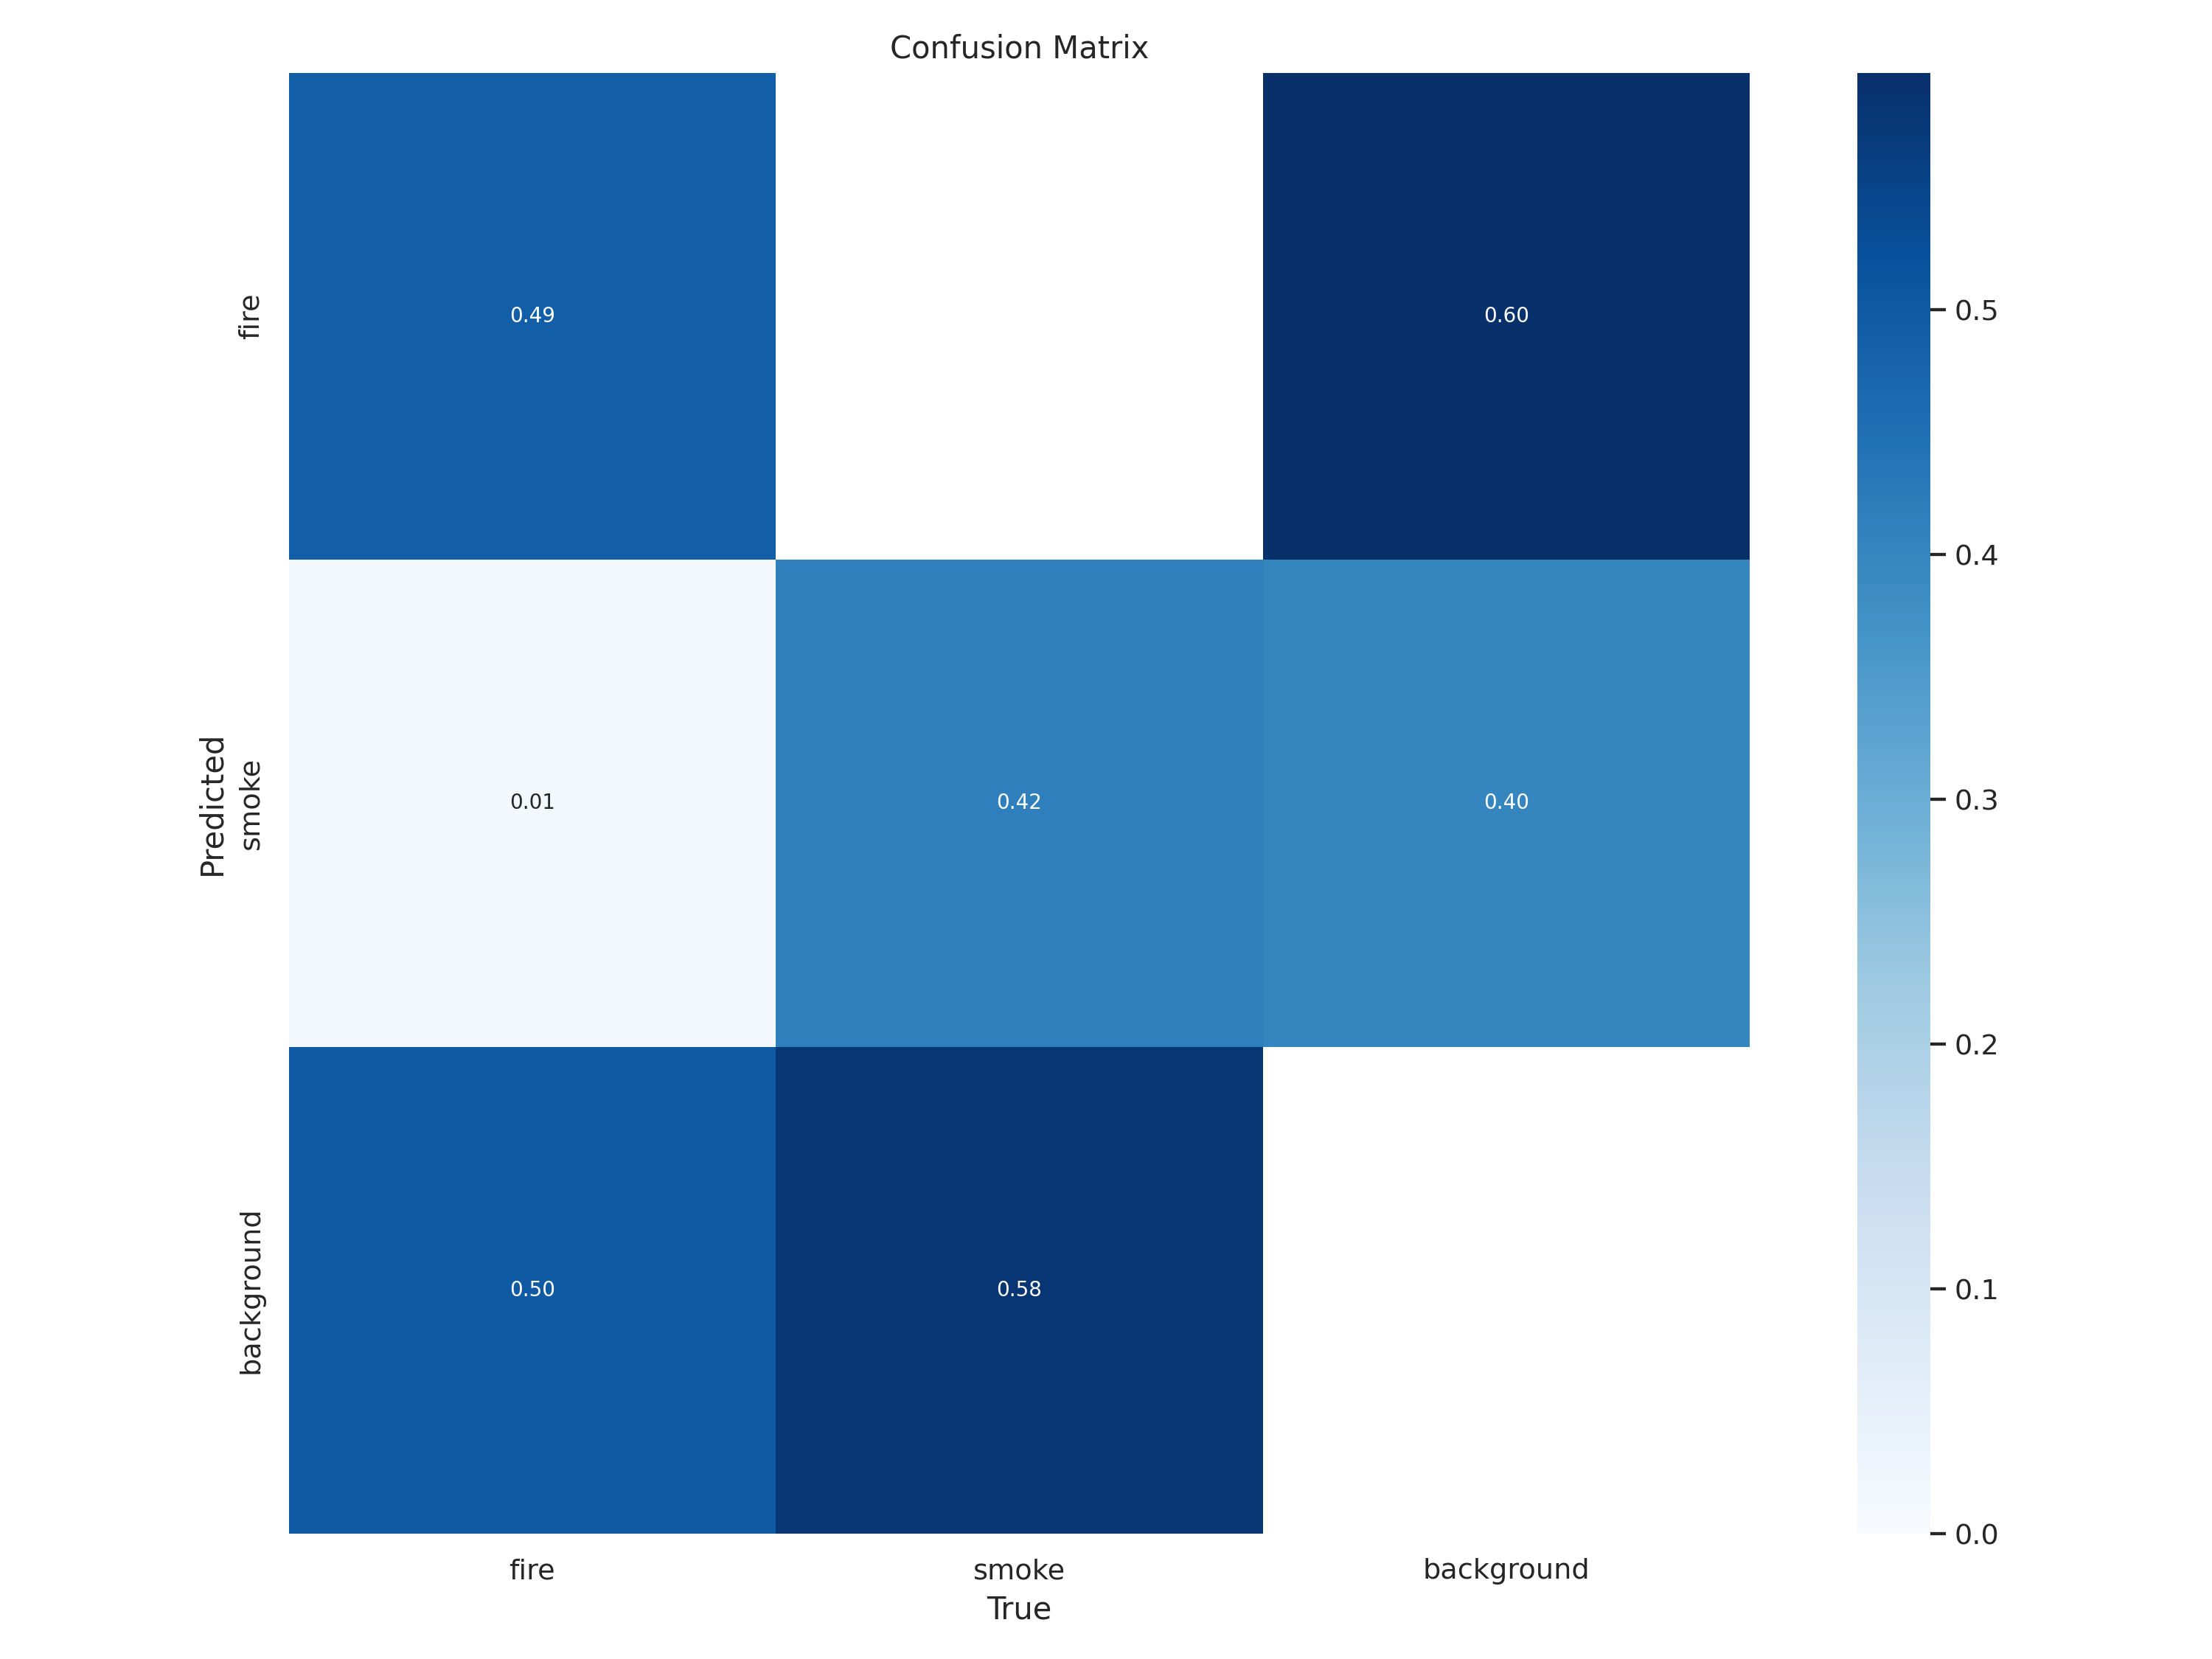

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


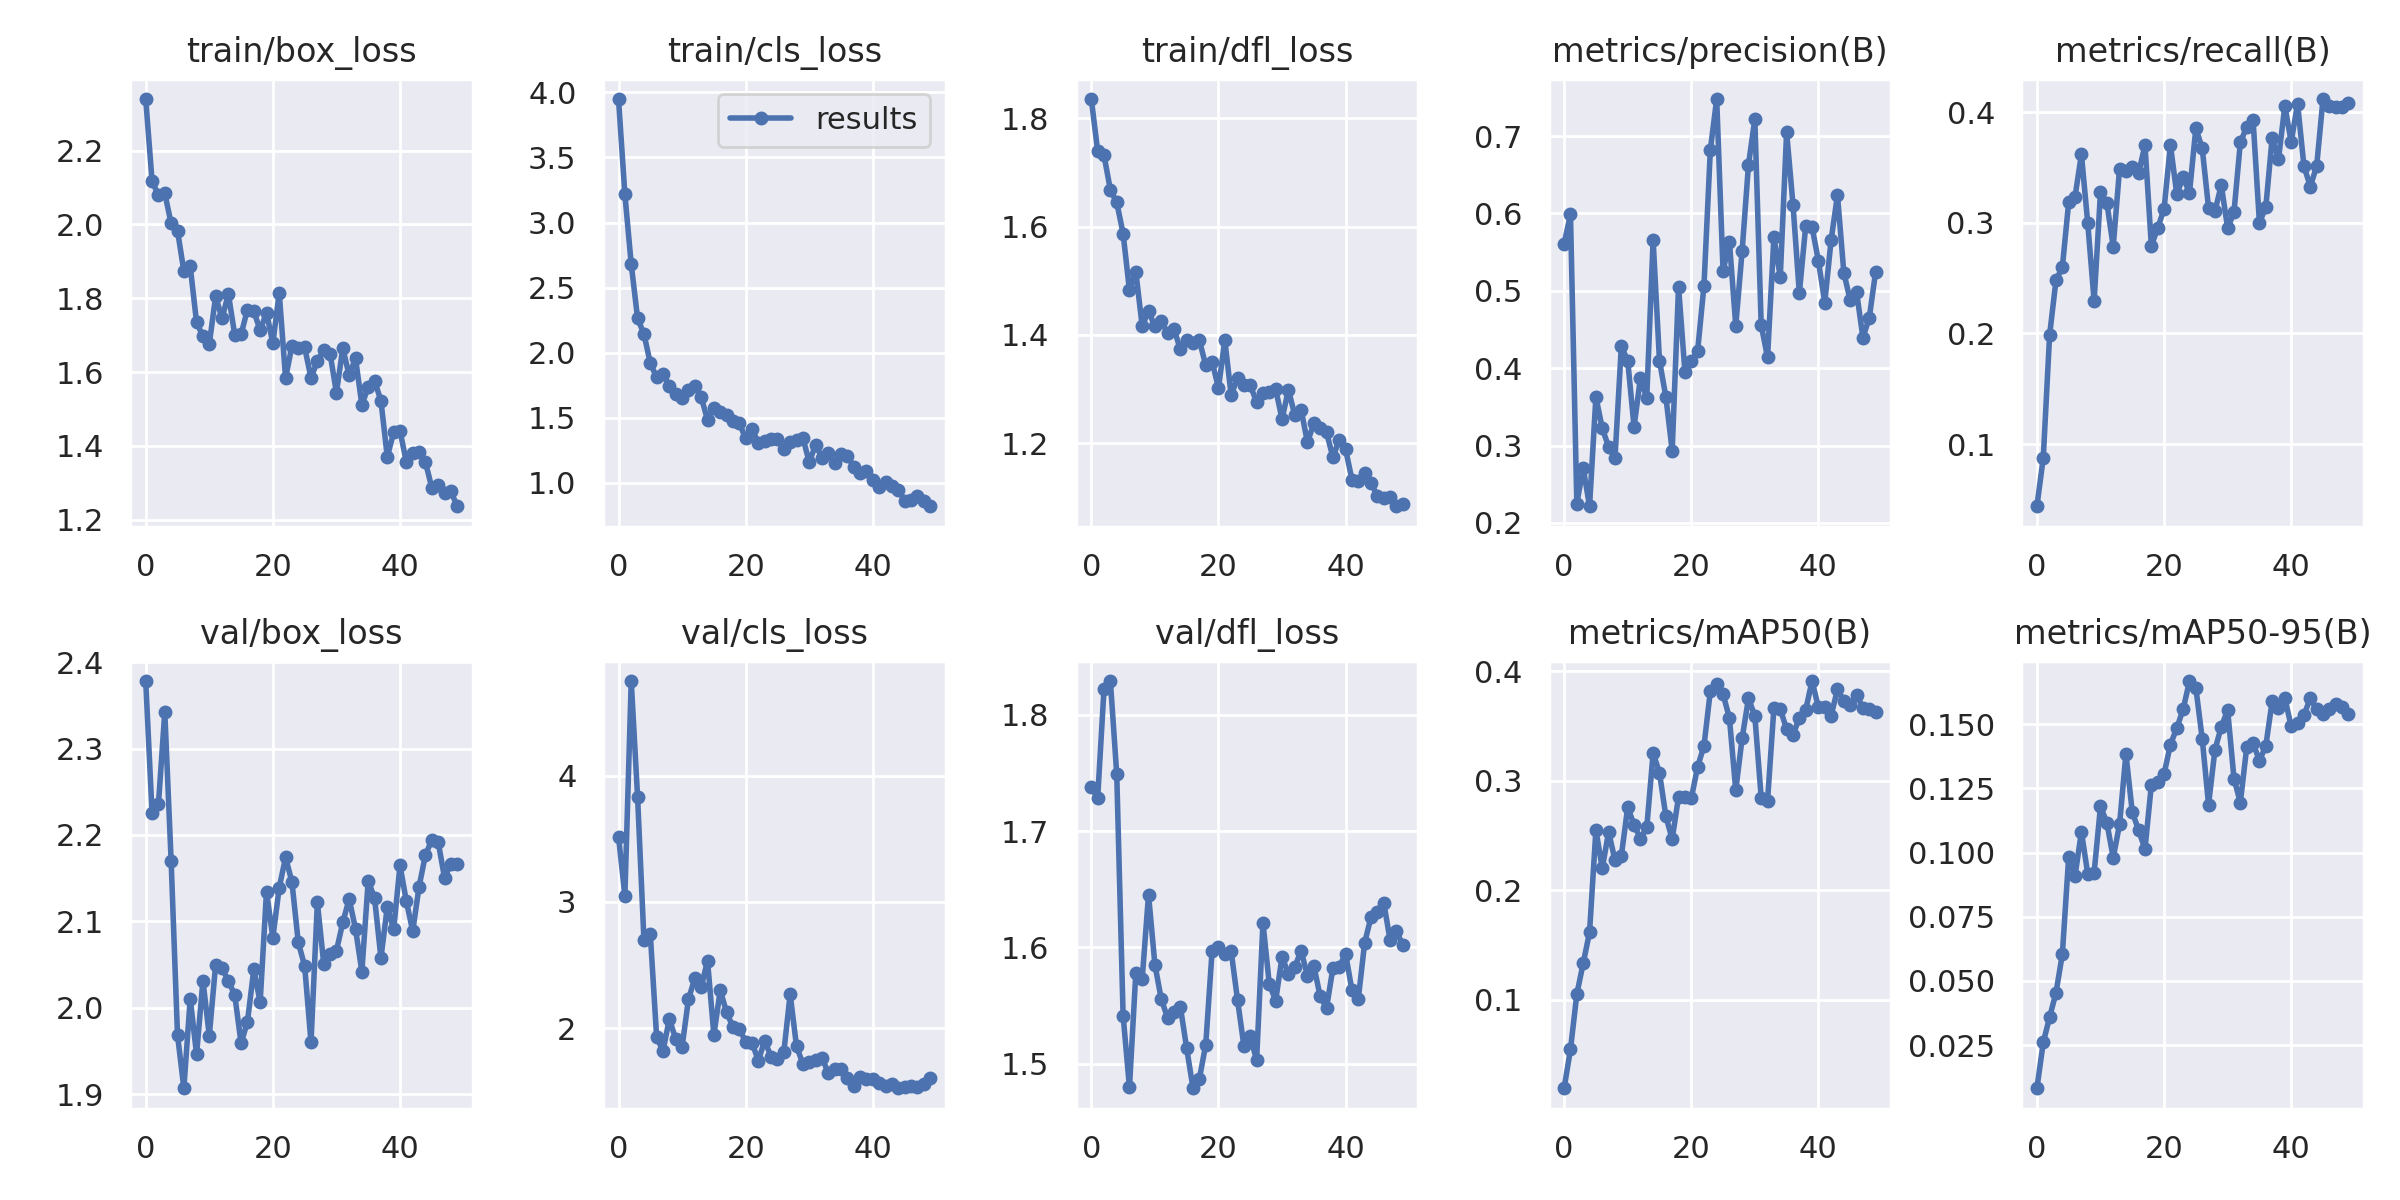

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/fire-and-smoke-detection-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa

/content


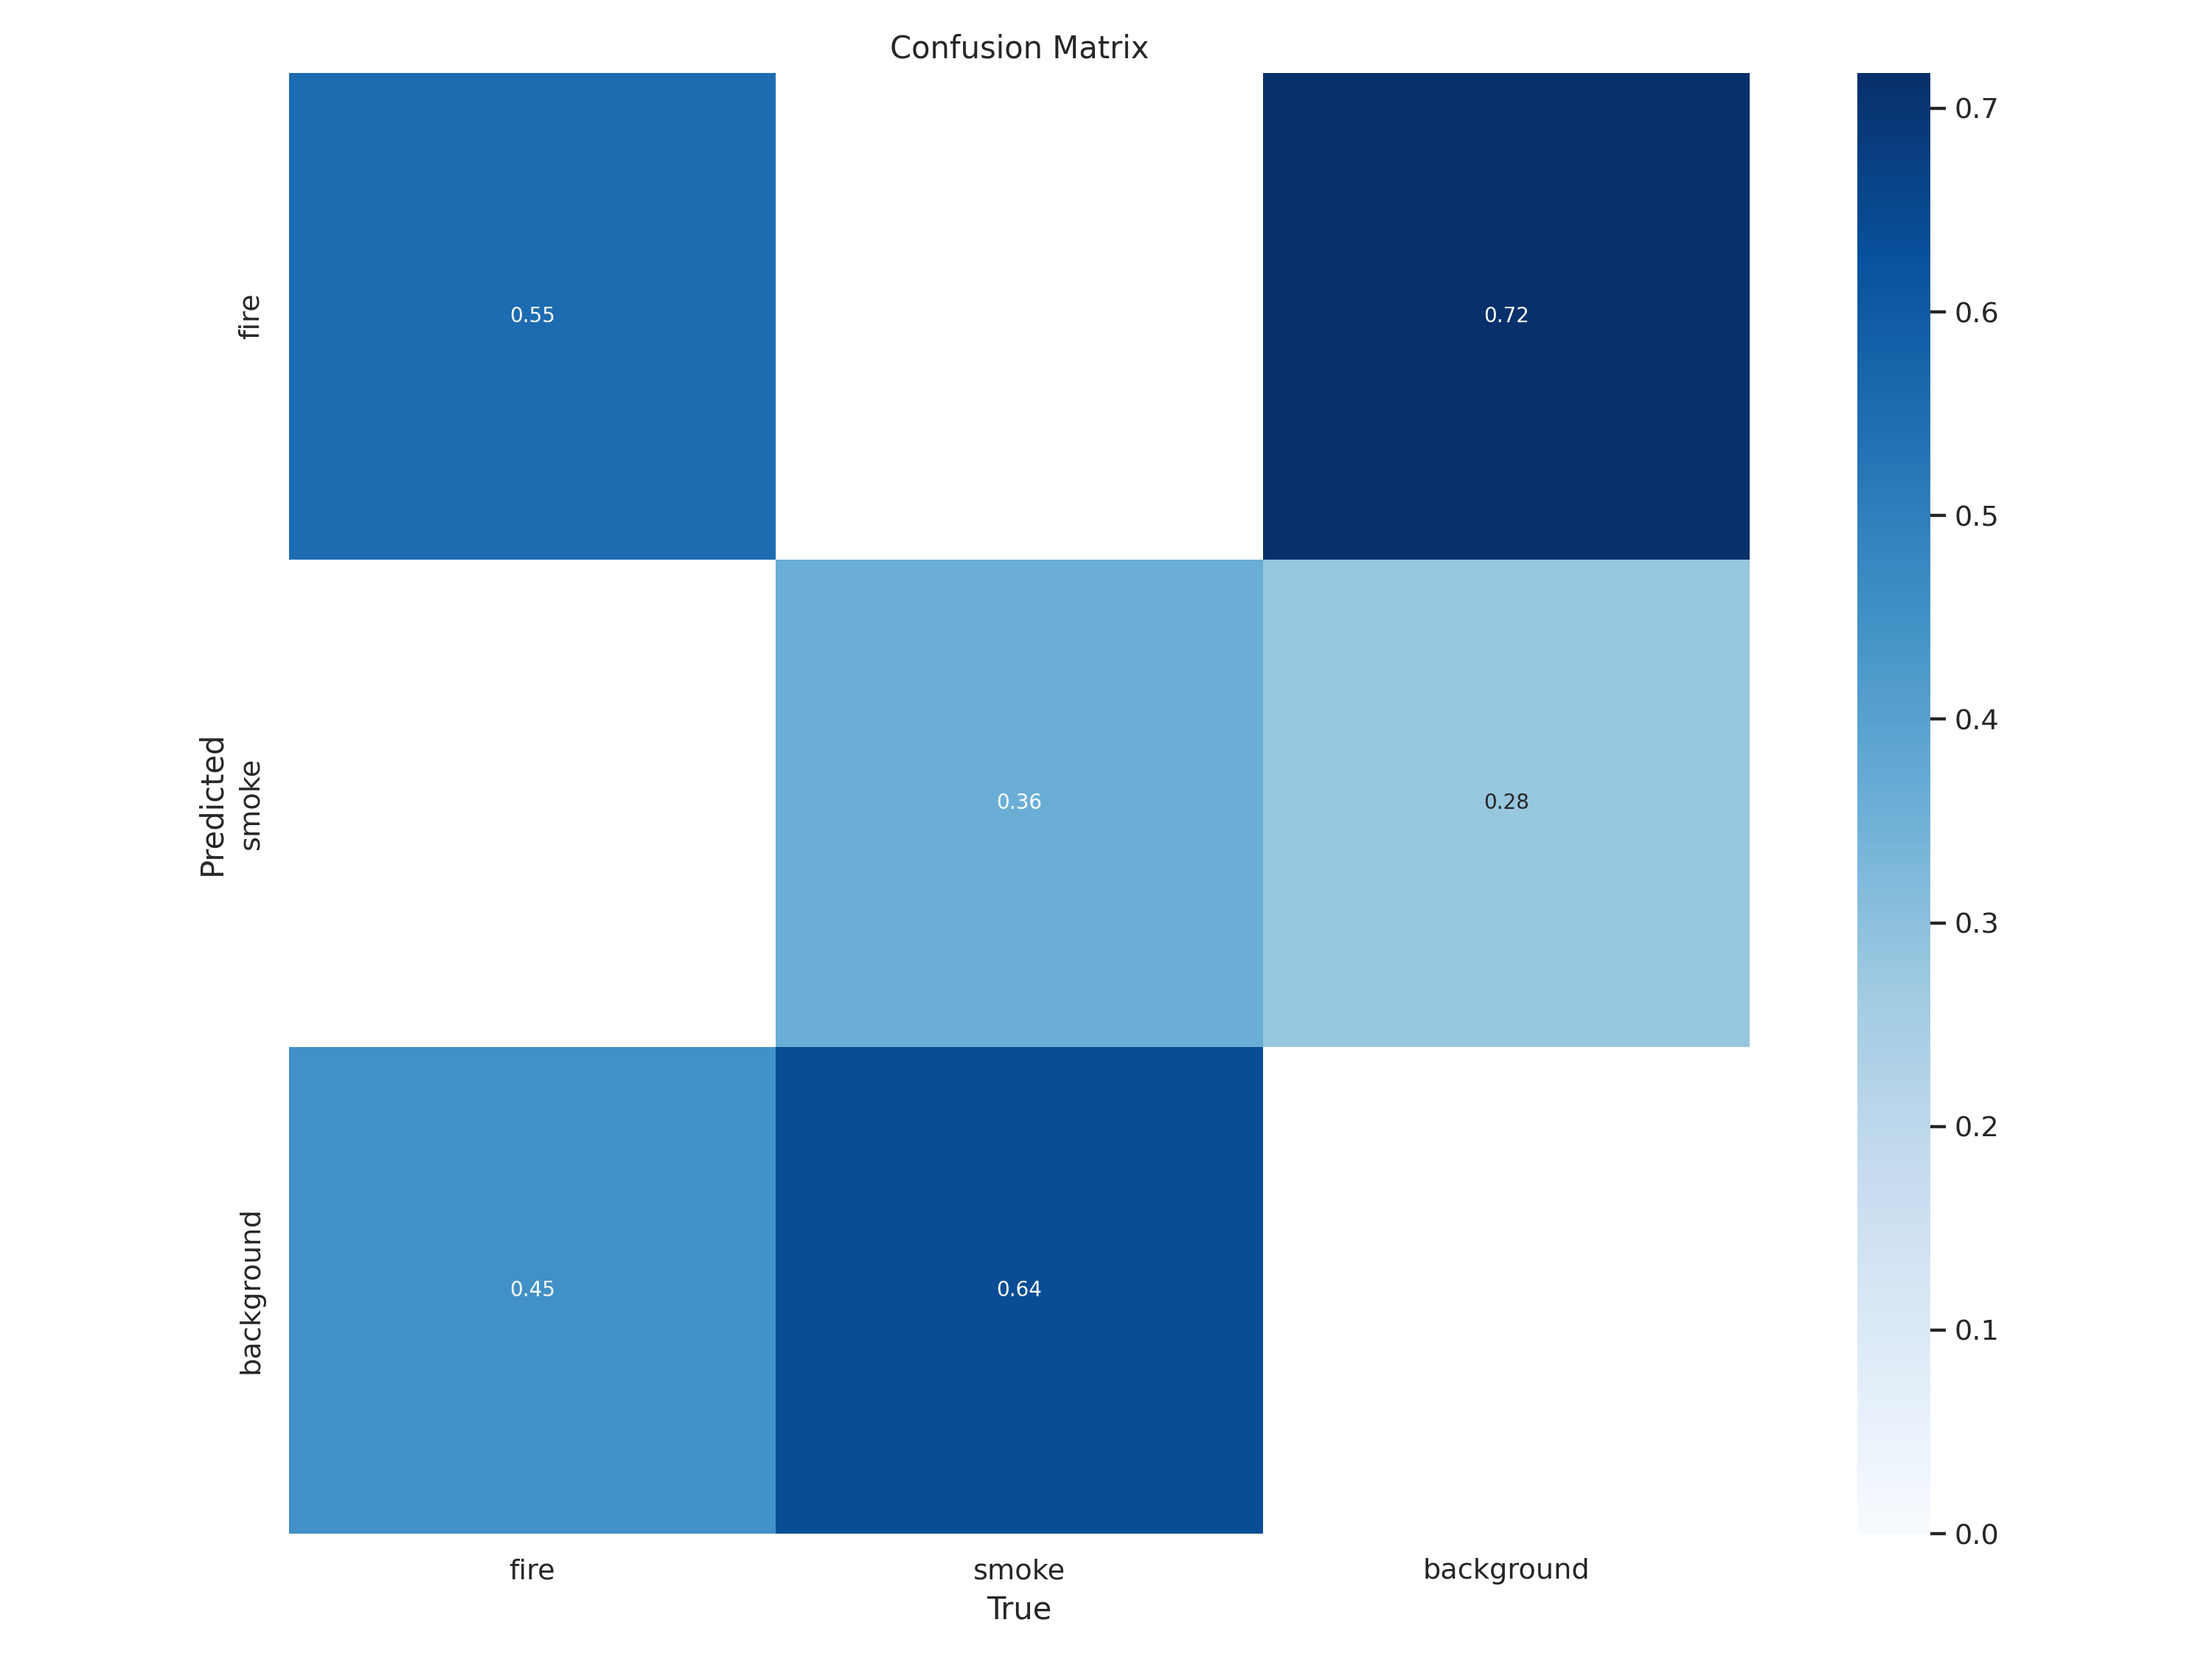

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


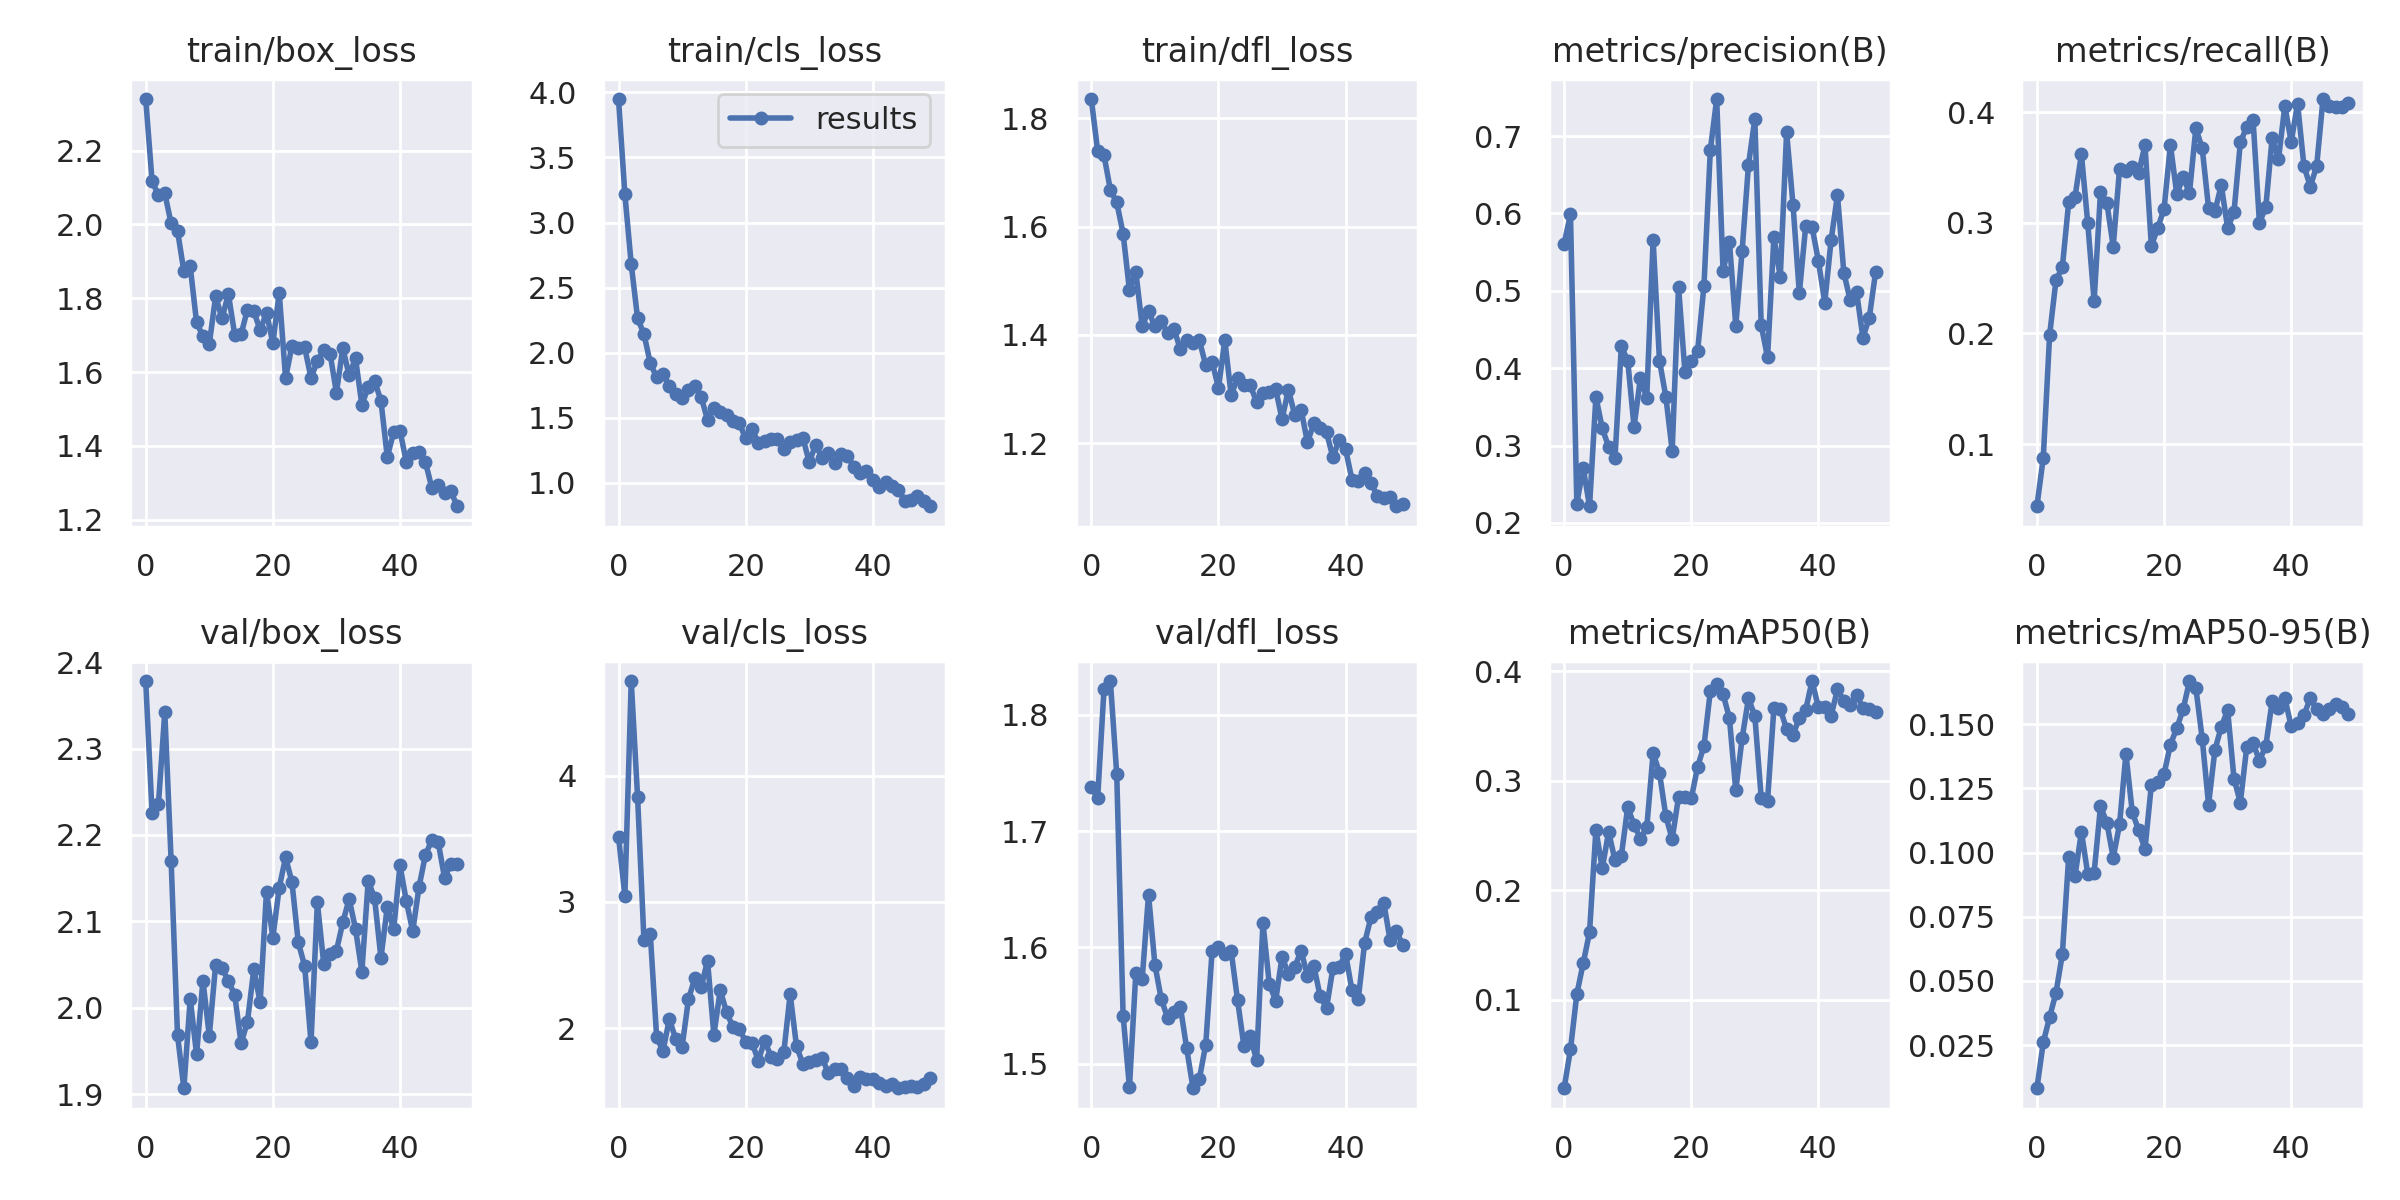

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


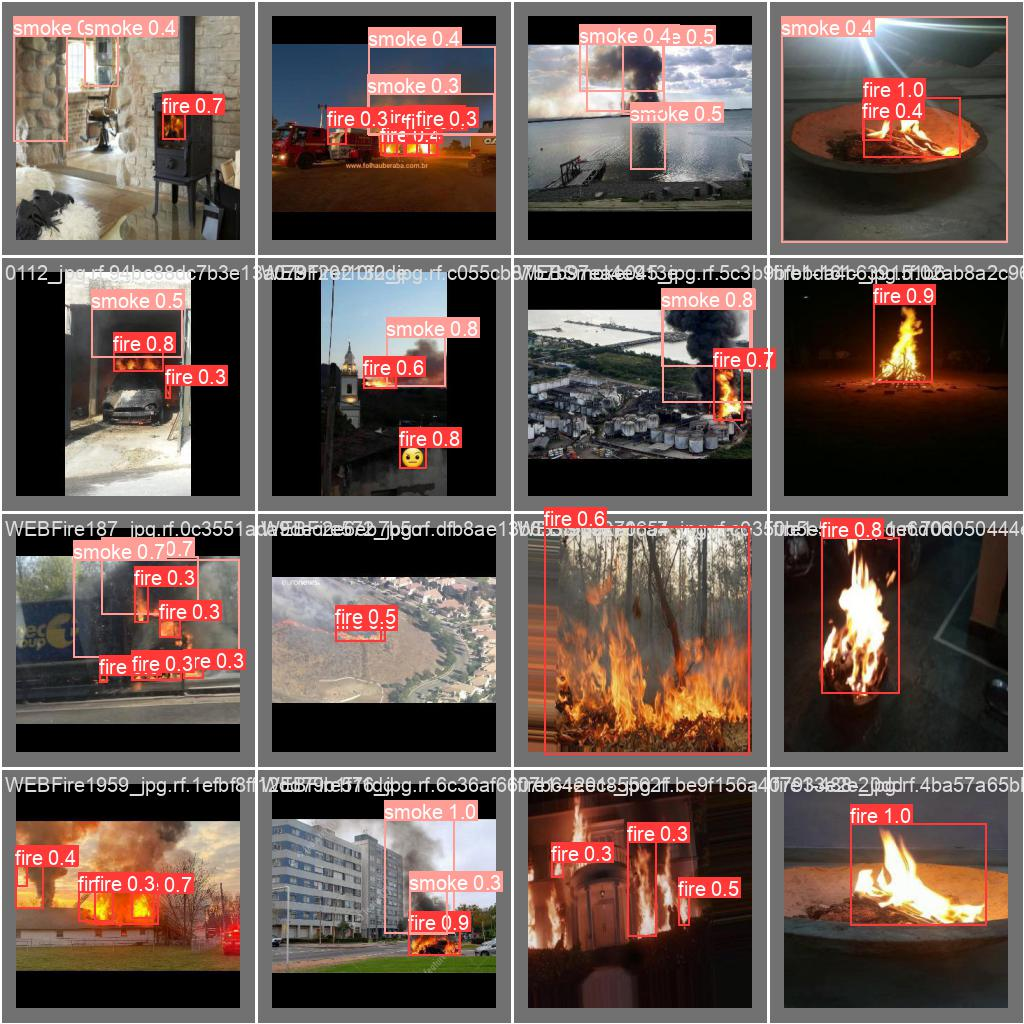

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


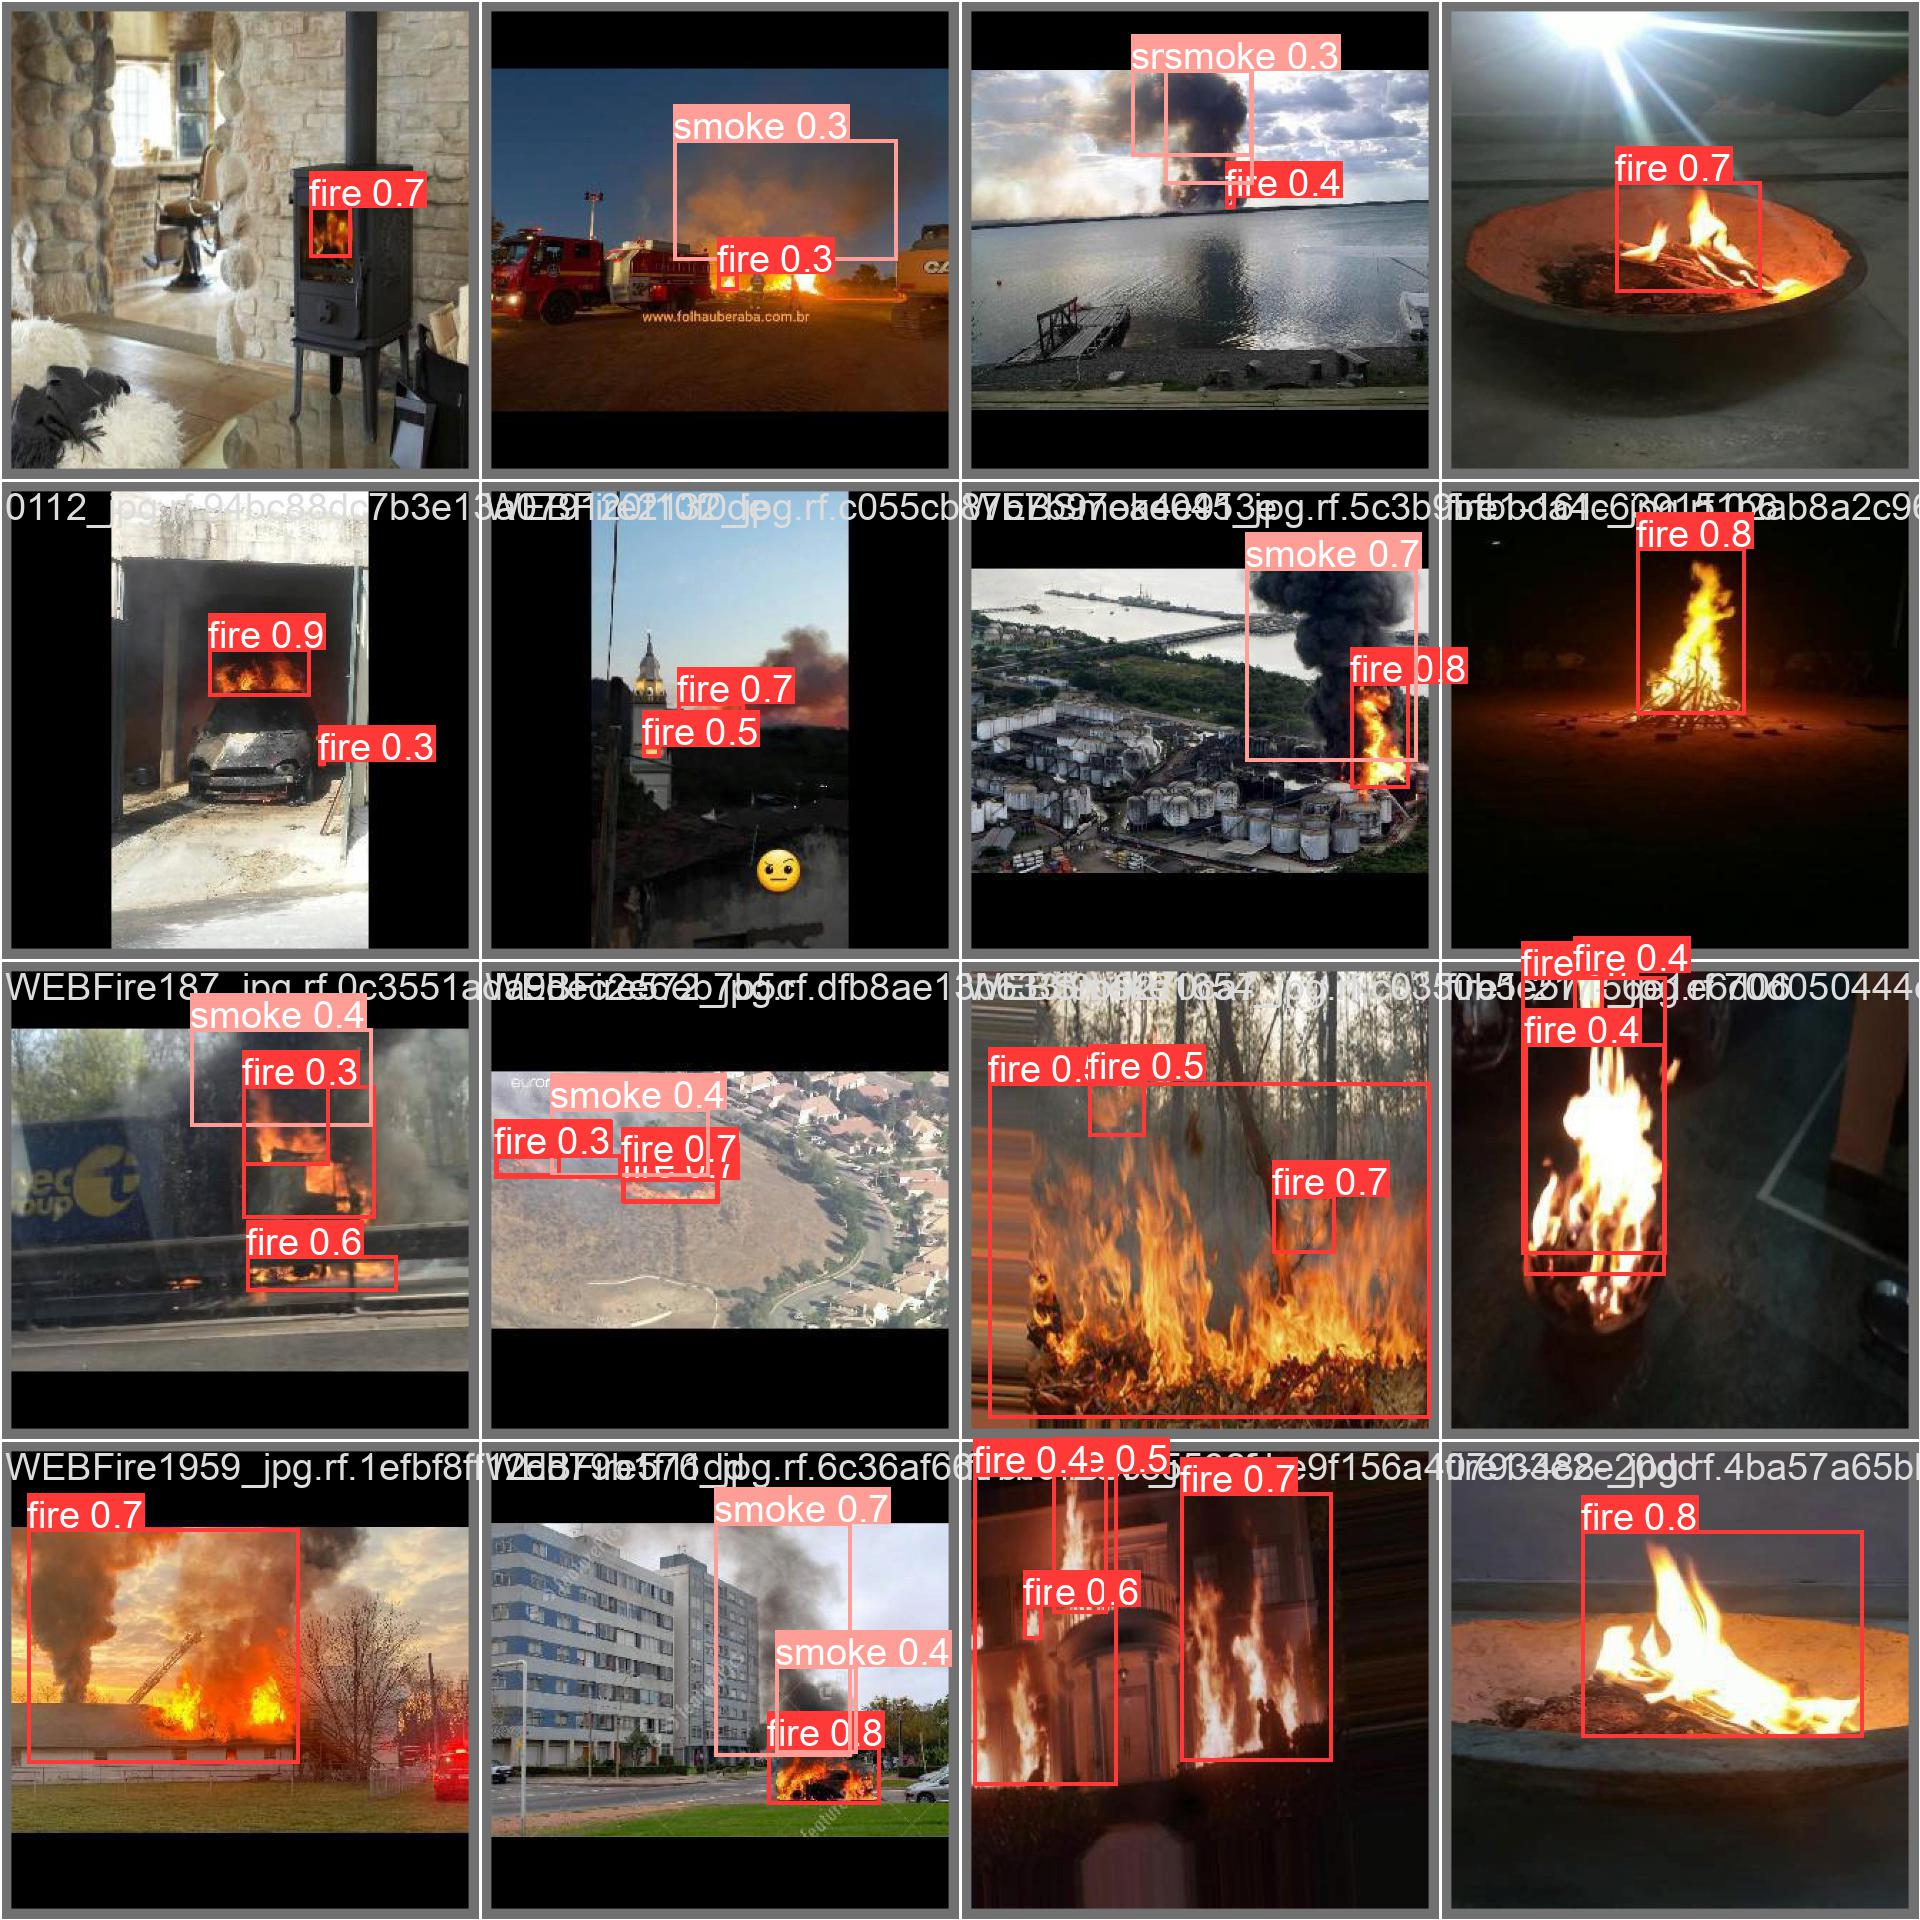

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/fire-and-smoke-detection-1/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.31it/s]
                   all         42        116      0.502      0.419        0.4      0.189
                  fire         42         80      0.559      0.525      0.507      0.261
                 smoke         42         36      0.446      0.313      0.294      0.117
Speed: 2.2ms pre-process, 12.0ms inference, 0.0ms loss, 3.0ms post-process per image


In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/19 /content/datasets/fire-and-smoke-detection-1/test/images/0104_jpg.rf.38f0e96bc5039669c98572a7375e2e02.jpg: 640x640 2 fires, 17.0ms
image 2/19 /content/datasets/fire-and-smoke-detection-1/test/images/884_jpg.rf.3c57f98e2c38c871e8946f9b6777aae4.jpg: 640x640 2 fires, 2 smokes, 17.1ms
image 3/19 /content/datasets/fire-and-smoke-detection-1/test/images/NoiseWEBFire187_jpg.rf.40ab5b5e74010170987cca2e7eb4f58d.jpg: 640x640 1 fire, 17.0ms
image 4/19 /content/datasets/fire-and-smoke-detection-1/test/images/NoiseWEBSmoke1215_jpg.rf.8dc0b5191c90a8bc68832f07344635f6.jpg: 640x640 9 fires, 17.1ms
image 5/19 /content/datasets/fire-and-smoke-detection-1/test/images/NoiseWEBSmoke480_jpg.rf.0dd22f30e3a0beddf514413f2c562c5b.jpg: 640x640 3 smokes, 17.0ms
image 6/19 /content/datasets/fire-and-smoke-detection-1/test/images/

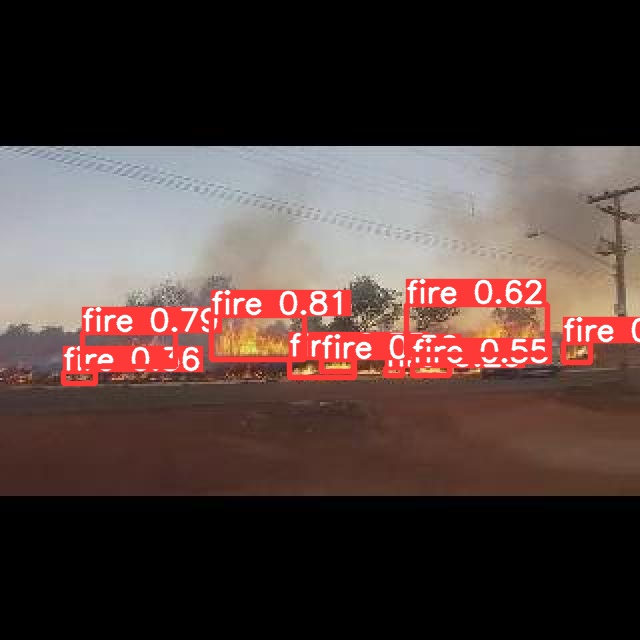

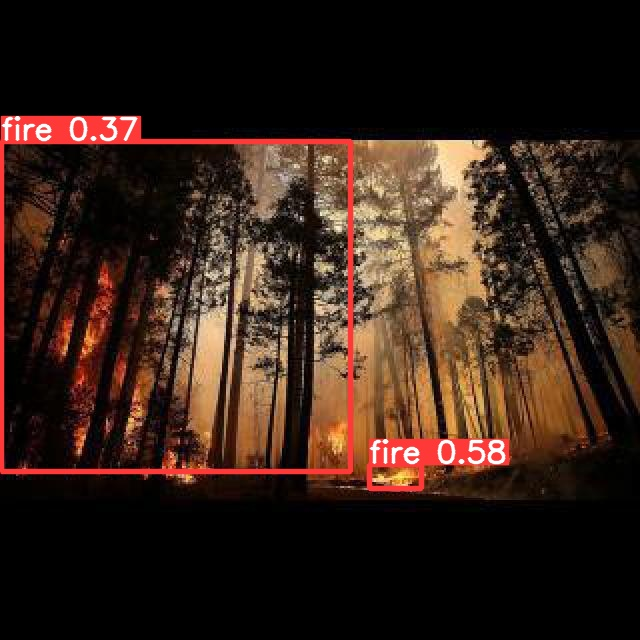

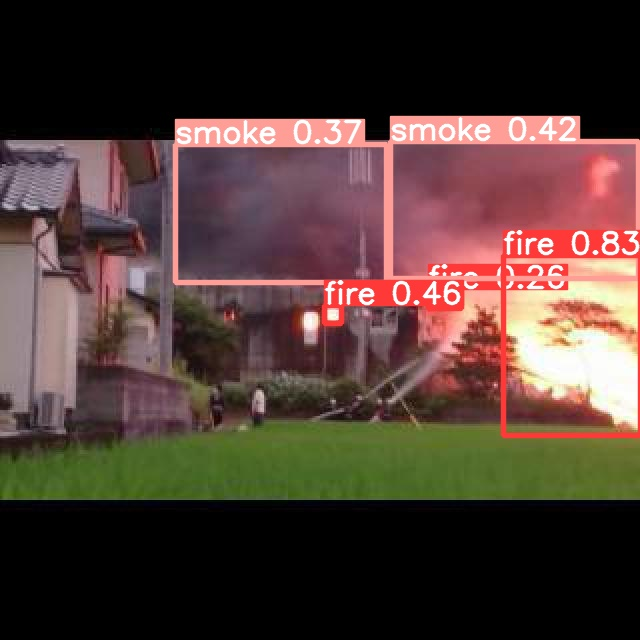

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/videofire.mp4 save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/1084) /content/videofire.mp4: 128x224 14.4ms
video 1/1 (2/1084) /content/videofire.mp4: 128x224 11.2ms
video 1/1 (3/1084) /content/videofire.mp4: 128x224 10.8ms
video 1/1 (4/1084) /content/videofire.mp4: 128x224 11.1ms
video 1/1 (5/1084) /content/videofire.mp4: 128x224 11.9ms
video 1/1 (6/1084) /content/videofire.mp4: 128x224 11.6ms
video 1/1 (7/1084) /content/videofire.mp4: 128x224 12.1ms
video 1/1 (8/1084) /content/videofire.mp4: 128x224 11.6ms
video 1/1 (9/1084) /content/videofire.mp4: 128x224 11.4ms
video 1/1 (10/1084) /content/videofire.mp4: 128x224 13.3ms
video 1/1 (11/1084) /content/videofire.mp4: 128x224 11.4ms
video 1/1 (12/1084) /content/videofire.mp4: 128x224 13.0ms
video 1/1 (13/1084) /content/videofire.mp4: 128x224 10.3ms
video 1/1 (14/1084) /content/videofire.mp4: 128x224 10.6ms
video 